Importing essential libraries and machine learnings.

In [124]:
#Importing libraries used for the task
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learnings req.d for the task
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

We load the dataset now from the url provided.

In [125]:
url = "https://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(url, sep=r"\s+", skiprows=22, header=None)

Forming the Dataframe and setting the target MEDV as we will be focusing on how different variables affect it

In [126]:
# Mixing to consecutive arrays to form a single array for each sample with data of all 13 variables
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

target = raw_df.values[1::2, 2]

columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", 
    "TAX", "PTRATIO", "B", "LSTAT"
]
df = pd.DataFrame(data, columns=columns)
df["MEDV"] = target #Our target variable

A small preview of the dataframe with the top 4 rows, to check if the dataset has been loaded correctly

In [127]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


DATA PREPROCESSING. 
This includes checking for the missing variables and analyzing the dataframe for some basic stats.

In [128]:
# Checking for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Basic statistics of the various varibles in the data
print(df.describe())

Missing values in each column:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD  

DATA VISUALIZATION.
This includes viewing the data in different ways. I've shown pair plots comparing some of the important variables which influence MEDV, i.e. RM,LSTAT and CRIM. Also graphical plots and correlation matrix of all the variables, and their influence on each other has also been provided.

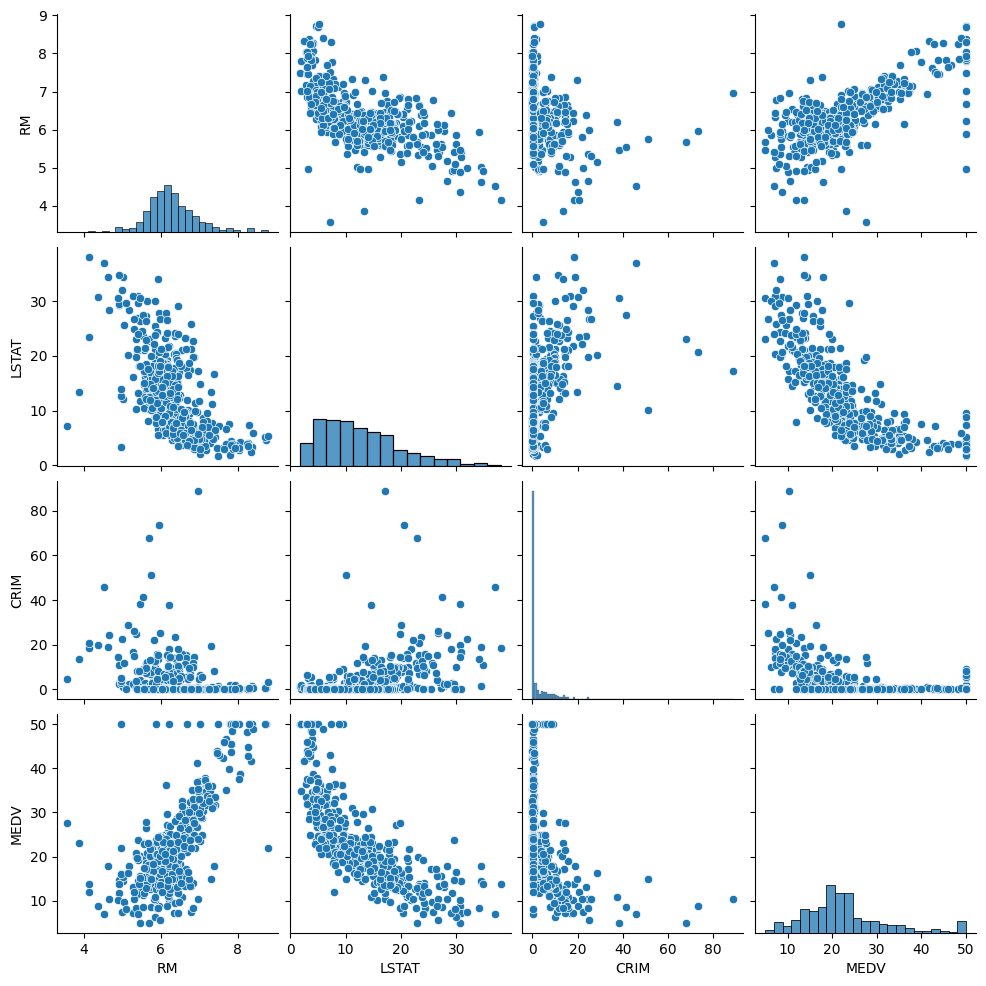

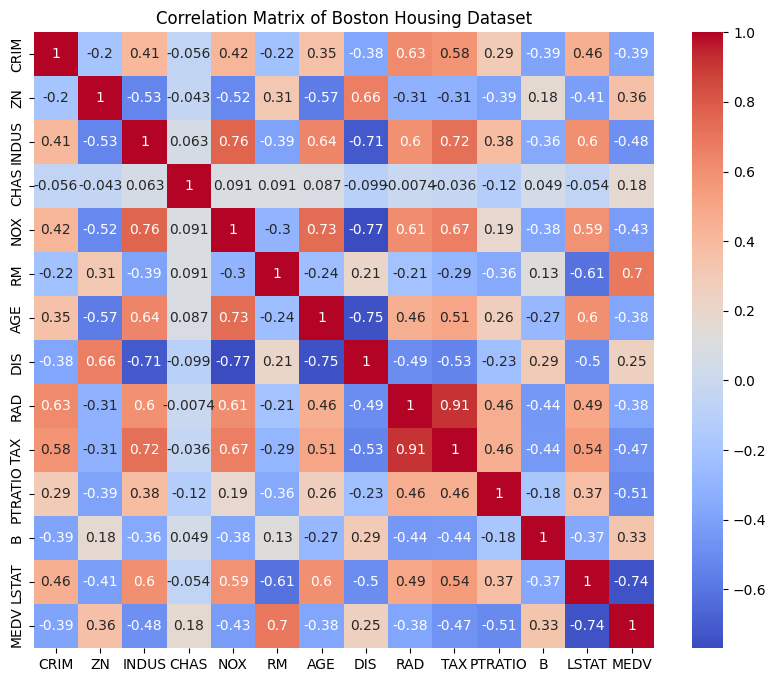

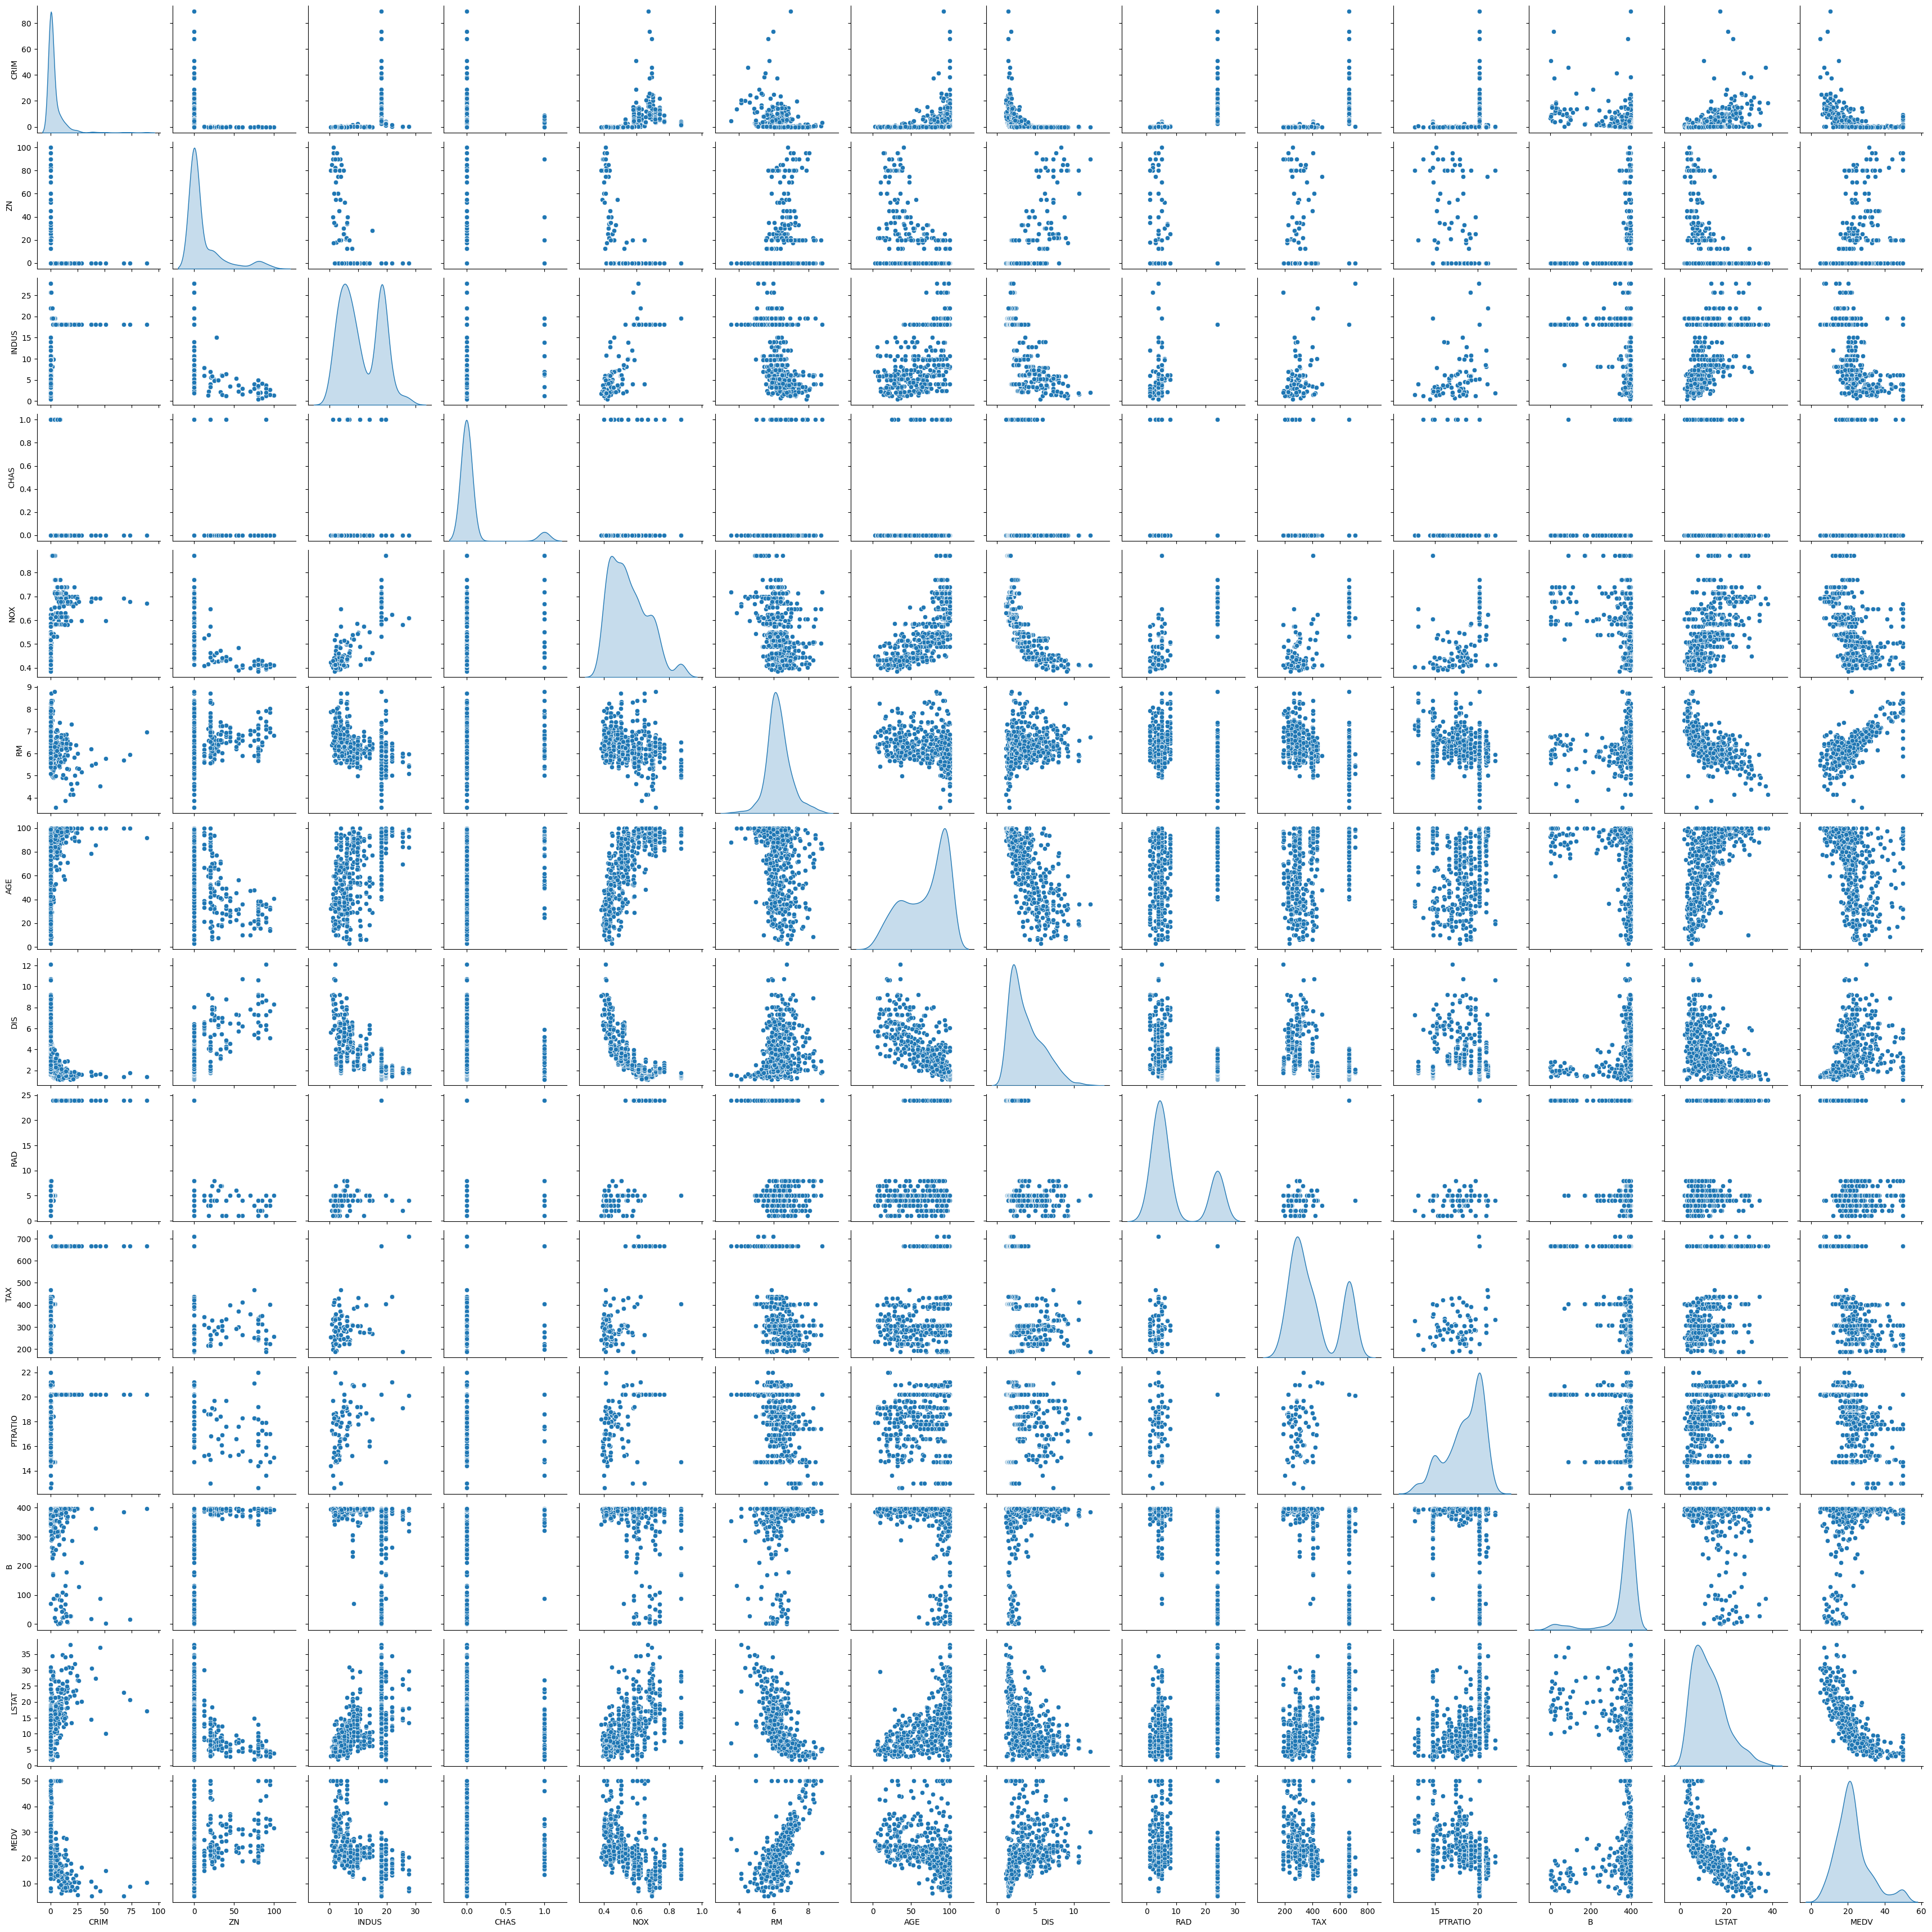

In [129]:
# Pair plots of some important combinations
sns.pairplot(df[['RM', 'LSTAT', 'CRIM', 'MEDV']])
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Boston Housing Dataset')
plt.show()

# Pair plots of all possible combinations
sns.pairplot(df, diag_kind='kde')
plt.show()

MODEL TRAINING

In [130]:
# Features (X) and target (y)
X = df.drop('MEDV', axis=1)  # All columns except 'MEDV'
y = df['MEDV']  # Target variable (house prices)

# Spliting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Training the model on the basis of the training data
model.fit(X_train, y_train)

LinearRegression()

MODEL EVALUATION. The analysis and the conclusion can be summarized by forming a few predictions while keeping in mind the mean squared error and r-squared values.

Mean Squared Error: 24.29111947497374
R-squared value: 0.6687594935356289


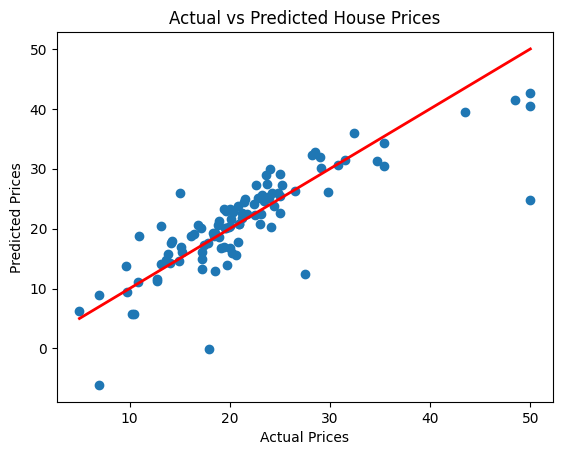

In [131]:
# Predictions
y_pred = model.predict(X_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared value:", r2)

# Plotting Actual vs Predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()